<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Model---Basic-Model" data-toc-modified-id="Load-Model---Basic-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Model - Basic Model</a></span><ul class="toc-item"><li><span><a href="#Model-Equations" data-toc-modified-id="Model-Equations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model Equations</a></span></li><li><span><a href="#Calibrating-Relationships" data-toc-modified-id="Calibrating-Relationships-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calibrating Relationships</a></span></li></ul></li><li><span><a href="#Solve-Steady-State" data-toc-modified-id="Solve-Steady-State-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solve Steady State</a></span><ul class="toc-item"><li><span><a href="#Steady-State-Equations" data-toc-modified-id="Steady-State-Equations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Steady State Equations</a></span></li></ul></li><li><span><a href="#Perturbation-Solution" data-toc-modified-id="Perturbation-Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perturbation Solution</a></span><ul class="toc-item"><li><span><a href="#Blanchard-Kahn-Conditions" data-toc-modified-id="Blanchard-Kahn-Conditions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Blanchard-Kahn Conditions</a></span></li><li><span><a href="#Model-Statistics" data-toc-modified-id="Model-Statistics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Statistics</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Impulse-Response-Functions" data-toc-modified-id="Impulse-Response-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Impulse Response Functions</a></span></li><li><span><a href="#Covnert-to-Dynare" data-toc-modified-id="Covnert-to-Dynare-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Covnert to Dynare</a></span></li><li><span><a href="#Adding-a-steady-state-block" data-toc-modified-id="Adding-a-steady-state-block-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adding a steady state block</a></span><ul class="toc-item"><li><span><a href="#Steady-State-Equations" data-toc-modified-id="Steady-State-Equations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Steady-State Equations</a></span></li><li><span><a href="#Solve-Steady-State" data-toc-modified-id="Solve-Steady-State-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Solve Steady State</a></span></li><li><span><a href="#Perturbation-Solution" data-toc-modified-id="Perturbation-Solution-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Perturbation Solution</a></span></li><li><span><a href="#Impulse-Response-Functions" data-toc-modified-id="Impulse-Response-Functions-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Impulse Response Functions</a></span></li><li><span><a href="#Conversion-to-Dynare" data-toc-modified-id="Conversion-to-Dynare-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Conversion to Dynare</a></span></li></ul></li><li><span><a href="#Priors" data-toc-modified-id="Priors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Priors</a></span><ul class="toc-item"><li><span><a href="#Model-Statistics" data-toc-modified-id="Model-Statistics-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Model Statistics</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Useful-things-to-do-with-priors" data-toc-modified-id="Useful-things-to-do-with-priors-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Useful things to do with priors</a></span><ul class="toc-item"><li><span><a href="#Simulation-from-Prior" data-toc-modified-id="Simulation-from-Prior-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Simulation from Prior</a></span></li><li><span><a href="#Steady-State-Bounds" data-toc-modified-id="Steady-State-Bounds-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Steady State Bounds</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import gEconpy as ge
import gEconpy.plotting as gp

import numpy as np
import sympy as sp

print(f"Running gEconpy version {ge.__version__}")

Running gEconpy version 0+untagged.253.g6e388ed.dirty


# Load Model - Basic Model

This GCN file is fully compatable with the original R version of gEcon, and doesn't include any of the new features of gEconpy.

If you look at the file, it also includes an `options` and `tryreduce` block. Options doesn't do anything at the moment, but `tryreduce` will allow you to prune unnecessary equations from the model. If you specify a variable in the `tryreduce` block, gEconpy will check that the variable only occurs in a single equation. If so, that equation can be removed from the model without changing the solution.

Removing excess equations lightens the load on the numerical solvers, so if there are variables you aren't actually interseted in studying, remove them. In this case, we have asked for total utility and total cost to be removed.

In addition, gEconpy will automatically check for variables that have been defined as constants. In the perfect competition setup, prices (marginal costs) are set to 1. gEconpy notices this and substitutes away the marginal cost variable. 

In [2]:
file_path = "../GCN Files/RBC_basic.gcn"
model = ge.model_from_gcn(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	6 parameters
		 0 / 6 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



## Model Equations

All the FoC are saved in the model object and can be manipulated using Sympy if needed

In [3]:
for eq in model.equations:
    display(eq)

-C_t - I_t + K_t-1*r_t + L_t*w_t

I_t - K_t + K_t-1*(1 - delta)

-lambda_t + C_t**(-sigma_C)

-L_t**sigma_L + lambda_t*w_t

beta*(lambda_t+1*r_t+1 - lambda_t+1*(delta - 1)) - lambda_t

A_t*K_t-1**alpha*L_t**(1 - alpha) - Y_t

alpha*A_t*K_t-1**(alpha - 1)*L_t**(1 - alpha) - r_t

A_t*K_t-1**alpha*(1 - alpha)/L_t**alpha - w_t

rho_A*log(A_t-1) + epsilon_A_t - log(A_t)

## Calibrating Relationships

In [4]:
for eq in model.calibrated_params:
    display(eq)

# Solve Steady State

By default, the steady state is found using a combination of Sympy simplifications and scipy optimizers. It can be slow the first time it is run, but it builds a function which can be reused to re-solve the steady-state much more quickly. This is useful when sampling from the prior or posterior.

In [5]:
ss_res = model.steady_state(how="root")

Output()

Steady state found
--------------------------------------------------------------------------------
Optimizer message             The solution converged.
Sum of squared residuals      6.694346901775185e-23
Maximum absoluate error       4.7553072590744705e-12
Gradient L2-norm at solution  3.2123187941480967e-10
Max abs gradient at solution  3.1686401419372956e-10


In [6]:
ge.print_steady_state(ss_res)

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


## Steady State Equations

You also have access to the steady state equations, if you need them.

In [7]:
for eq in model.equations:
    display(ge.utilities.eq_to_ss(eq).simplify())

-C_ss - I_ss + K_ss*r_ss + L_ss*w_ss

-delta*K_ss + I_ss

-lambda_ss + C_ss**(-sigma_C)

-L_ss**sigma_L + lambda_ss*w_ss

lambda_ss*(beta*(-delta + r_ss + 1) - 1)

A_ss*K_ss**alpha*L_ss**(1 - alpha) - Y_ss

alpha*A_ss*K_ss**(alpha - 1)*L_ss**(1 - alpha) - r_ss

(-A_ss*K_ss**alpha*(alpha - 1) - L_ss**alpha*w_ss)/L_ss**alpha

rho_A*log(A_ss) + epsilon_A_ss - log(A_ss)

# Linearization

In [8]:
A, B, C, D = model.linearize_model(steady_state=ss_res)

In [9]:
ge.matrix_to_dataframe(A, model, dim1="equation", round=3)

,A,C,I,K,L,Y,lambda,r,w
Equation 0,0.00,0.0,0.0,1.076,0.0,0.0,0.0,0.0,0.0
Equation 1,0.00,0.0,0.0,35.018,0.0,0.0,0.0,0.0,0.0
Equation 2,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Equation 3,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Equation 4,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Equation 5,0.00,0.0,0.0,1.076,0.0,0.0,0.0,0.0,0.0
Equation 6,0.00,0.0,0.0,-0.020,0.0,0.0,0.0,0.0,0.0
Equation 7,0.00,0.0,0.0,0.853,0.0,0.0,0.0,0.0,0.0
Equation 8,0.95,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


In [10]:
ge.matrix_to_dataframe(B, model, dim1="equation", round=3)

,A,C,I,K,L,Y,lambda,r,w
Equation 0,0.000,-2.358,-0.715,0.000,1.998,0.000,0.000,1.076,1.998
Equation 1,0.000,0.000,0.715,-35.732,0.000,0.000,0.000,0.000,0.000
Equation 2,0.000,-0.414,0.000,0.000,0.000,0.000,-0.276,0.000,0.000
Equation 3,0.000,0.000,0.000,0.000,-1.345,0.000,0.673,0.000,0.673
Equation 4,0.000,0.000,0.000,0.000,0.000,0.000,-0.276,0.000,0.000
Equation 5,3.073,0.000,0.000,0.000,1.998,-3.073,0.000,0.000,0.000
Equation 6,0.030,0.000,0.000,0.000,0.020,0.000,0.000,-0.030,0.000
Equation 7,2.436,0.000,0.000,0.000,-0.853,0.000,0.000,0.000,-2.436
Equation 8,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [11]:
ge.matrix_to_dataframe(C, model, dim1="equation", round=3)

,A,C,I,K,L,Y,lambda,r,w
Equation 0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 4,0.0,0.0,0.0,0.0,0.0,0.0,0.276,0.008,0.0
Equation 5,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 6,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 7,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
Equation 8,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0


In [12]:
ge.matrix_to_dataframe(D, model, dim1="equation", round=3)

,epsilon_A
Equation 0,0
Equation 1,0
Equation 2,0
Equation 3,0
Equation 4,0
Equation 5,0
Equation 6,0
Equation 7,0
Equation 8,1


# Perturbation Solution

Like the steady state solution, the perturbation solution constructs a function to solve linearized system via perturbation. The first time you run the function will be slower. 

Following Dynare, the default pertubation solver is Cycle Reduction, implemented in Numba for faster execution. You can also ask for Gensys if you wish. The original gEcon used Gensys.

In [13]:
T, R = model.solve_model(steady_state=ss_res)

Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [14]:
ge.matrix_to_dataframe(T, model).round(3)

,A,C,I,K,L,Y,lambda,r,w
A,0.950,-0.0,-0.0,-0.000,-0.0,-0.0,-0.0,-0.0,-0.0
C,0.310,0.0,0.0,0.479,0.0,0.0,0.0,0.0,0.0
I,3.641,-0.0,-0.0,-0.513,-0.0,-0.0,-0.0,-0.0,-0.0
K,0.073,-0.0,-0.0,0.970,-0.0,-0.0,-0.0,-0.0,-0.0
L,0.207,0.0,0.0,-0.157,0.0,0.0,0.0,0.0,0.0
Y,1.084,0.0,0.0,0.248,0.0,0.0,0.0,0.0,0.0
lambda,-0.464,0.0,0.0,-0.718,0.0,0.0,0.0,0.0,0.0
r,1.084,0.0,0.0,-0.752,0.0,0.0,0.0,0.0,0.0
w,0.878,0.0,0.0,0.405,0.0,0.0,0.0,0.0,0.0


In [15]:
ge.matrix_to_dataframe(R, model).round(3)

,epsilon_A
A,1.000
C,0.326
I,3.832
K,0.077
L,0.217
Y,1.141
lambda,-0.489
r,1.141
w,0.924


## Blanchard-Kahn Conditions

After you have a perturbation solution, you can check the Eigenvalues of the system to make sure the BK conditions are satisfied.

The output shows the eigenvalues computed by gensys: the modulus, real part, and imaginary part.

In [16]:
ge.bk_condition(model, steady_state=ss_res);

Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables. 
Blanchard-Kahn condition is satisfied.


You can also visualize the Eigenvalues using `plot_eigenvalues` in the plotting functions.

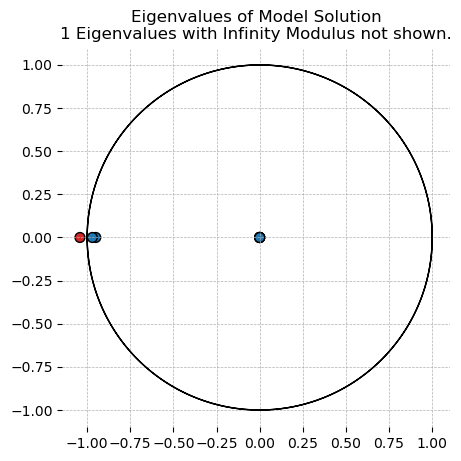

In [17]:
gp.plot_eigenvalues(model, linearize_model_kwargs={"steady_state": ss_res});

## Model Statistics

Functions to compute the stationary covariance matrix, as well as autocovariances for each variable, are also available.

In [18]:
cov = np.eye(1) * 0.1
sigma = ge.stationary_covariance_matrix(model, T=T, R=R, shock_cov_matrix=cov)
acorr = ge.autocovariance_matrix(model, T=T, R=R, shock_cov_matrix=np.eye(1), n_lags=30)

In [19]:
sigma

,A,C,I,K,L,Y,lambda,r,w
A,1.025641,0.788370,3.444292,0.998345,0.074484,1.406005,-1.182554,0.457577,1.331522
C,0.788370,0.970392,2.257223,1.505521,-0.061981,1.269645,-1.455588,-0.220535,1.331626
I,3.444292,2.257223,11.984536,2.562105,0.377826,4.519312,-3.385834,2.149502,4.141486
K,0.998345,1.505521,2.562105,2.466929,-0.169017,1.751230,-2.258281,-0.713757,1.920247
L,0.074484,-0.061981,0.377826,-0.169017,0.044423,0.040296,0.092972,0.220473,-0.004126
Y,1.406005,1.269645,4.519312,1.751230,0.040296,2.025356,-1.904467,0.330618,1.985060
lambda,-1.182554,-1.455588,-3.385834,-2.258281,0.092972,-1.904467,2.183382,0.330802,-1.997439
r,0.457577,-0.220535,2.149502,-0.713757,0.220473,0.330618,0.330802,1.102809,0.110145
w,1.331522,1.331626,4.141486,1.920247,-0.004126,1.985060,-1.997439,0.110145,1.989186


Unlike the stationary covariance, the computed autocovariances will be returned as an `xarray` with a `lag` dimension. This lets you inspect correlations between all combinations of variables and timesteps.

In [20]:
acorr

<xarray.DataArray (lag: 30, variable: 9, variable_aux: 9)> Size: 19kB
array([[[ 1.02564103e+01,  7.88369636e+00,  3.44429175e+01, ...,
         -1.18255445e+01,  4.57577052e+00,  1.33152163e+01],
        [ 7.88369636e+00,  9.70391982e+00,  2.25722253e+01, ...,
         -1.45558797e+01, -2.20534849e+00,  1.33162590e+01],
        [ 3.44429175e+01,  2.25722253e+01,  1.19845356e+02, ...,
         -3.38583380e+01,  2.14950199e+01,  4.14148623e+01],
        ...,
        [-1.18255445e+01, -1.45558797e+01, -3.38583380e+01, ...,
          2.18338196e+01,  3.30802273e+00, -1.99743884e+01],
        [ 4.57577052e+00, -2.20534849e+00,  2.14950199e+01, ...,
          3.30802273e+00,  1.10280878e+01,  1.10144584e+00],
        [ 1.33152163e+01,  1.33162590e+01,  4.14148623e+01, ...,
         -1.99743884e+01,  1.10144584e+00,  1.98918619e+01]],

       [[ 9.74358974e+00,  7.48951154e+00,  3.27207716e+01, ...,
         -1.12342673e+01,  4.34698199e+00,  1.26494555e+01],
        [ 7.95551773e+00,  9.64887741e+00,  2.29314886e+01, ...,
         -1.44733161e+01, -2.00017271e+00,  1.33162741e+01],
        [ 3.22216892e+01,  2.09829290e+01,  1.12259607e+02, ...,
         -3.14743935e+01,  2.03186241e+01,  3.86310319e+01],
...
        [-9.37039422e+00, -9.51519871e+00, -2.89908242e+01, ...,
          1.42727981e+01, -5.48879399e-01, -1.41204407e+01],
        [-5.77747158e+00, -6.86198427e+00, -1.68089017e+01, ...,
          1.02929764e+01,  1.22448203e+00, -9.54775430e+00],
        [ 6.86363871e+00,  6.57946068e+00,  2.16531806e+01, ...,
         -9.86919102e+00,  1.01488083e+00,  1.00129699e+01]],

       [[ 2.31728760e+00,  1.78120720e+00,  7.78187919e+00, ...,
         -2.67181080e+00,  1.03382919e+00,  3.00838059e+00],
        [ 6.13173839e+00,  6.20827957e+00,  1.89903373e+01, ...,
         -9.31241936e+00,  3.87776936e-01,  9.22464071e+00],
        [ 3.12255571e+00,  7.99013659e-01,  1.22009373e+01, ...,
         -1.19852049e+00,  3.90755574e+00,  2.69986339e+00],
        ...,
        [-9.19760758e+00, -9.31241936e+00, -2.84855059e+01, ...,
          1.39686290e+01, -5.81665404e-01, -1.38369611e+01],
        [-5.79820920e+00, -6.80467604e+00, -1.69569898e+01, ...,
          1.02070141e+01,  1.10020149e+00, -9.51273803e+00],
        [ 6.68717049e+00,  6.40437510e+00,  2.11028087e+01, ...,
         -9.60656265e+00,  9.98090254e-01,  9.75052139e+00]]])
Coordinates:
  * lag           (lag) int64 240B 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * variable      (variable) <U6 216B 'A' 'C' 'I' 'K' 'L' 'Y' 'lambda' 'r' 'w'
  * variable_aux  (variable_aux) <U6 216B 'A' 'C' 'I' 'K' ... 'lambda' 'r' 'w'

You can also plot the covaraince matrix as a heatmap using `gp.plot_covariance_heatmap`.

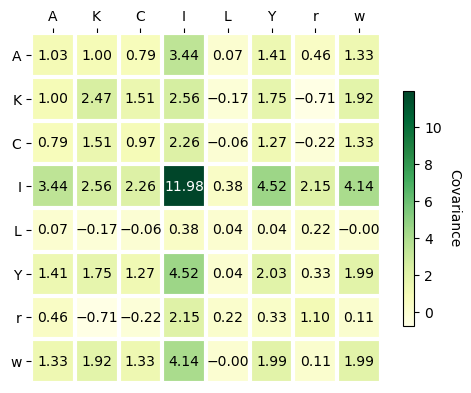

In [21]:
gp.plot_covariance_matrix(
    sigma,
    ["A", "K", "C", "I", "L", "Y", "r", "w"],
    figsize=(5, 5),
    cbar_kw=dict(shrink=0.5),
);

Similarly, there is a function to plot the autocorrelation functions, `plot_acf`. This only plots self-autocorrelations. For the off-diagonals, you will need to hand-roll something.

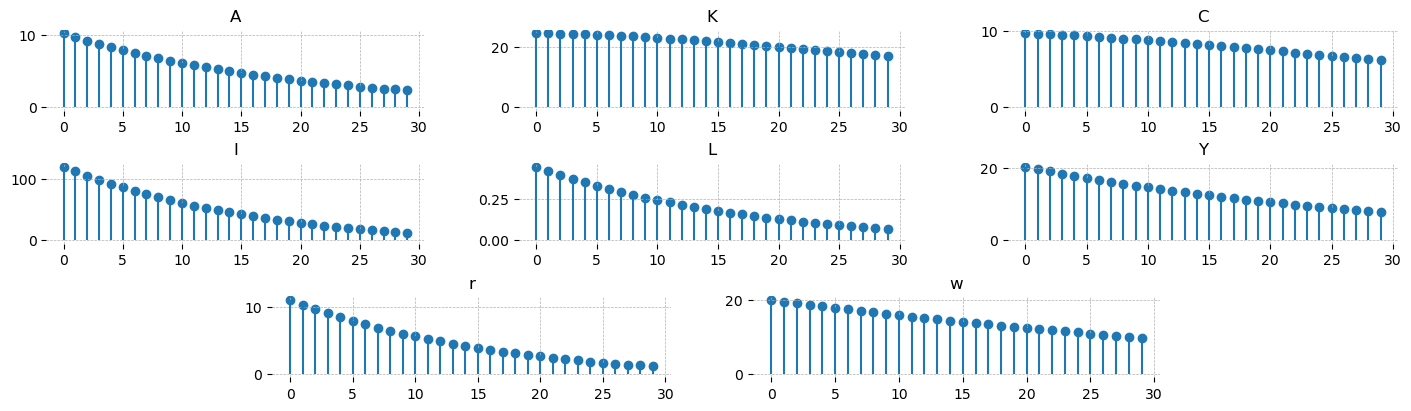

In [22]:
gp.plot_acf(acorr, vars_to_plot=["A", "K", "C", "I", "L", "Y", "r", "w"], n_cols=3);

# Simulation

You can simulate the model by passing a covariance matrix for the shocks. The default is a spaghetti plot, but you can also ask for confidence intervals if you prefer a cleaner look.

In [23]:
simulation = ge.simulate(model, T, R, shock_cov_matrix=cov, n_simulations=100)

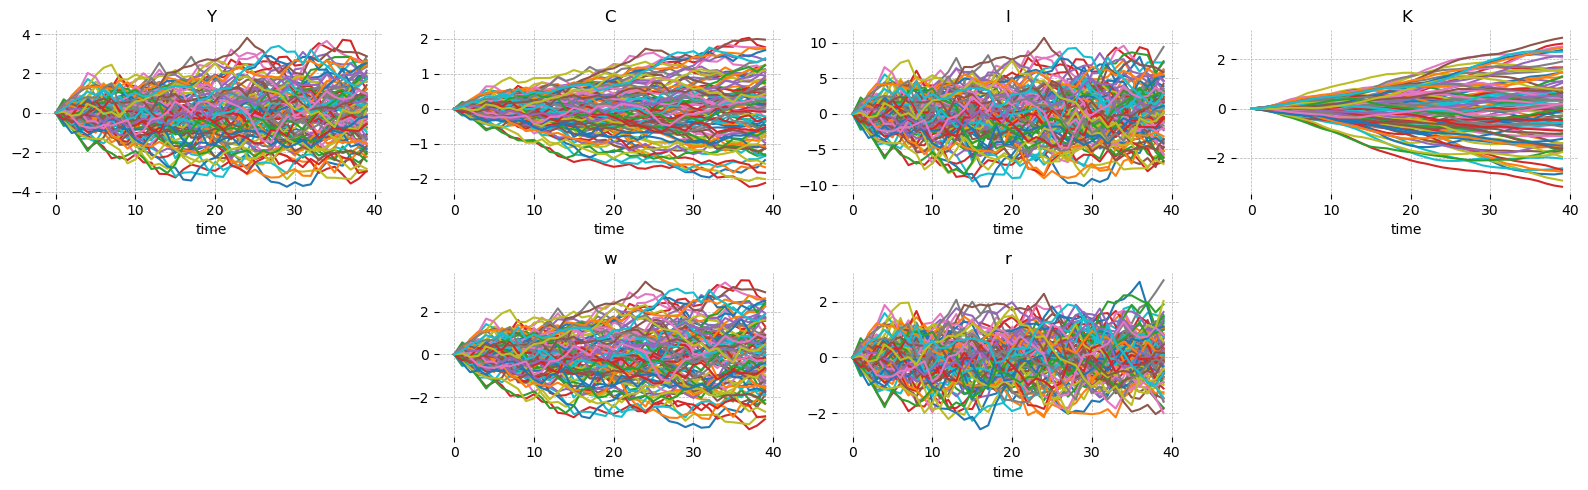

In [24]:
gp.plot_simulation(
    simulation, vars_to_plot=["Y", "C", "I", "K", "w", "r"], n_cols=4, figsize=(16, 5)
);

The confidence intervals need plenty of simulations or else they come out looking quite "jagged".

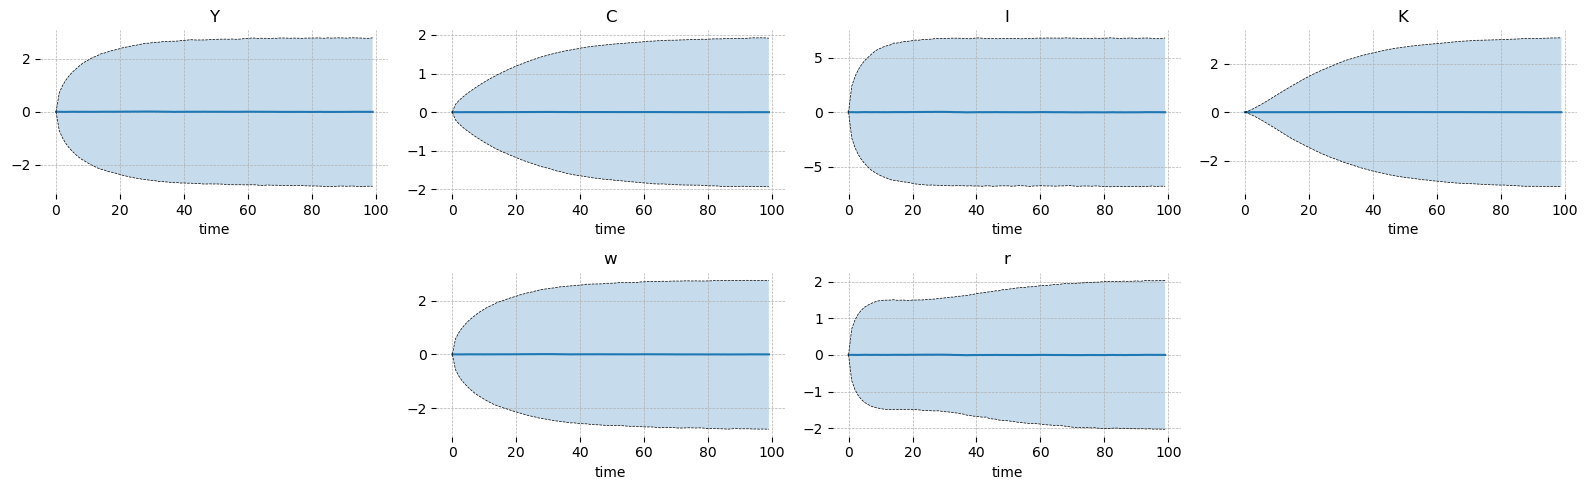

In [25]:
simulation = ge.simulate(
    model, T, R, shock_cov_matrix=cov, n_simulations=100_000, simulation_length=100
)

gp.plot_simulation(
    simulation,
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    ci=0.95,
    n_cols=4,
    figsize=(16, 5),
);

With a large number of simulations you can also compute sample statistics and verify the stationary solution. Evidently they match to about the 2nd decimal place with 10_000 samples at T=99. One could extend `simulation_length` and increase `n_simulations` to obtain more accurate estimates.

In [26]:
import pandas as pd

tols = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accuracy_df = pd.DataFrame(
    0, columns=tols, index=[x.base_name for x in model.variables]
)
for tol in tols:
    accuracy_df[tol] = (
        (np.cov(simulation.isel(time=-1).values.T) - sigma).abs() < tol
    ).all()
print(
    "Absolute difference between stationary covariance matrix and sample covariance matrix is less than:"
)
print(accuracy_df.to_string())

Absolute difference between stationary covariance matrix and sample covariance matrix is less than:
        0.10000  0.01000  0.00100  0.00010  0.00001
A          True    False    False    False    False
C          True    False    False    False    False
I          True    False    False    False    False
K          True    False    False    False    False
L          True     True    False    False    False
Y          True    False    False    False    False
lambda     True    False    False    False    False
r          True    False    False    False    False
w          True    False    False    False    False


# Impulse Response Functions

They are impulse repsonse functions. Not much to say. The plots start from 0 and the shock enters at 1, which is different from Dynare, which starts the plot at the period the shock enters. The `irf` object returned by the `model.impulse_response_function` method is just a Pandas dataframe, so you can slice it as you like to customize the plots.

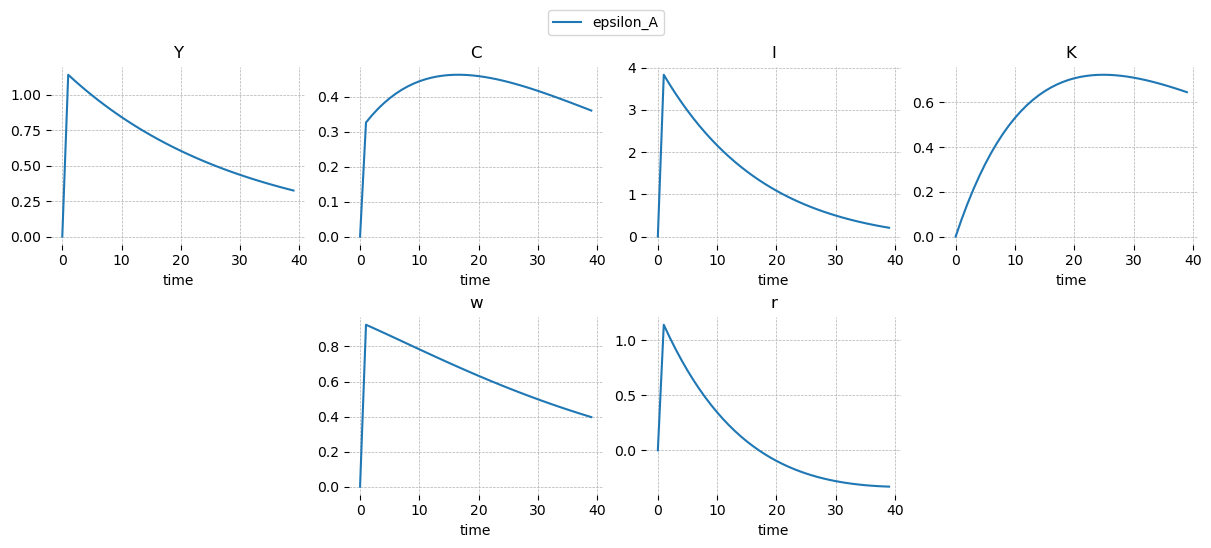

In [27]:
irf = ge.impulse_response_function(model, T=T, R=R, shock_size={"epsilon_A": 1.0})
gp.plot_irf(
    irf,
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    n_cols=4,
    figsize=(12, 5),
    legend=True,
);

# Covnert to Dynare

Since Dynare remains the gold standard for DSGE model analysis, gEconpy can convert the model into a Dynare `.mod` file. Greek variable names are automatically prefixed with either `var_` or `param_`, to avoid any namespace collisions in Matlab. 

In [28]:
print(ge.make_mod_file(model))

You provided a function to compute the full hessian, but method trust-ncg allows the use of a hessian-vector product instead. Consider passing hessp instead -- this may be significantly more efficient.


Output()

Steady state IS found, although optimizer returned success = False.
This can be ignored, but to silence this message, try reducing the solver-specific tolerance, or use a different solution algorithm.
--------------------------------------------------------------------------------
Optimizer message             A bad approximation caused failure to predict improvement.
Sum of squared residuals      7.817537743289768e-29
Maximum absoluate error       8.552207923778995e-15
Gradient L2-norm at solution  5.825605443052315e-16
Max abs gradient at solution  5.620504062164855e-16


var A, C, I, K, L, Y, r, var_lambda, w;
varexo epsilon_A;

parameters param_alpha, param_beta, param_delta, rho_A;
parameters sigma_C, sigma_L;

param_alpha = 0.35;
param_beta = 0.99;
param_delta = 0.02;
rho_A = 0.95;
sigma_C = 1.5;
sigma_L = 2.0;

model;
-C - I + K(-1) * r + L * w = 0;
I - K + K(-1) *(1 - param_delta) = 0;
-var_lambda + C ^(- sigma_C) = 0;
-L ^ sigma_L + var_lambda * w = 0;
param_beta *(r(1) * var_lambda(1) - var_lambda(1) *(param_delta - 1)) - var_lambda = 0;
A * K(-1) ^ param_alpha * L ^(1 - param_alpha) - Y = 0;
A * K(-1) ^(param_alpha - 1) * L ^(1 - param_alpha) * param_alpha - r = 0;
A * K(-1) ^ param_alpha *(1 - param_alpha) / L ^ param_alpha - w = 0;
epsilon_A + rho_A * log(A(-1)) - log(A) = 0;
end;

initval;
A = 1.0000;
C = 2.3584;
I = 0.7146;
K = 35.7323;
L = 0.8201;
Y = 3.0731;
var_lambda = 0.2761;
r = 0.0301;
w = 2.4358;
end;

steady;
check(qz_zero_threshold=1e-20);

shocks;
var epsilon_A;
stderr 0.01;
end;

stoch_simul(order=1, irf=100, qz_zero_threshold=1

# Adding a steady state block

RBC_steady_state.gcn shows how you can define a steady state in the GCN file to make the job of the numerical solver easier. 

* If you provide a complete steady-state solution, gEconpy will check the residuals of your solution and report if there is an error, but will not resort to using a numerical solver.

* If you provide a partial steady-state solution, the relationships you provide will be substituted into the remaining equations, the system will be reduced via Sympy.simplify, and the remaining system of equations will be passed to the numerical solver.

In [29]:
file_path = "../GCN Files/RBC_steady_state.gcn"
model = ge.model_from_gcn(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		P_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	6 parameters
		 0 / 6 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



## Steady-State Equations

Steady state equations are stored in the `model.steady_state_relationships` dictionary, with string keys of the form "Y_ss". I convert them to TimeAwareSymbols here to show the equations.

Admittedly, they aren't very easy to read in sympy. This could maybe be improved by adding additional assumptions to the variables (positive only, real only, etc), and using some clever arguments on `sp.simplify`. I'm not a Sympy expert.

Note that in this example, I have entered the entire steady state solution. In a more complex model, this may not be possible. In that case, you can pass only a subset of steady state relationships, and allow the combination of the heuristic solver and scipy optimizer to find everything else. 

Either way, for anything beyond a simple model, it is strongly recommended to pass as much steady state information as possible.

In [30]:
from gEconpy.classes.time_aware_symbol import TimeAwareSymbol

for eq in model.steady_state_relationships:
    display(eq)

Eq(A_ss, 1.0)

Eq(C_ss, -delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**alpha*(((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**(1 - alpha))

Eq(I_ss, delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))

Eq(K_ss, (alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))

Eq(L_ss, ((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))

Eq(Y_ss, ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**alpha*(((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**(1 - alpha))

Eq(lambda_ss, (-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha))*((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**alpha*(((1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha/(-delta*(alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)) + ((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)**sigma_C)**(1/(sigma_C + sigma_L)))**(1 - alpha))**(-sigma_C))

Eq(r_ss, -(1 - delta) + 1/beta)

Eq(w_ss, (1 - alpha)*((alpha*beta/(1 - beta*(1 - delta)))**(1/(1 - alpha)))**alpha)

## Solve Steady State

Since the entire steady state is provided, it solves much more quickly. Several expensive symbolic reduction loops are skipped.

In [31]:
%timeit ss_res = model.steady_state()
ge.print_steady_state(ss_res)

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


66.7 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Perturbation Solution

Sadly, nothing special happens in the perturbation solver.

In [32]:
T, R = model.solve_model()

Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [33]:
for name, policy_matrix in zip(["T", "R"], [T, R]):
    print(name.center(10).center(50, "="))
    display(ge.matrix_to_dataframe(policy_matrix, model))

====================    T     ====================


,A,C,I,K,L,Y,lambda,r,w
A,0.950000,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
C,0.309657,0.0,0.0,0.478747,0.0,0.0,0.0,0.0,0.0
I,3.640697,-0.0,-0.0,-0.512728,-0.0,-0.0,-0.0,-0.0,-0.0
K,0.072814,-0.0,-0.0,0.969745,-0.0,-0.0,-0.0,-0.0,-0.0
L,0.206602,0.0,0.0,-0.156647,0.0,0.0,0.0,0.0,0.0
Y,1.084291,0.0,0.0,0.248179,0.0,0.0,0.0,0.0,0.0
lambda,-0.464485,0.0,0.0,-0.718121,0.0,0.0,0.0,0.0,0.0
r,1.084291,0.0,0.0,-0.751821,0.0,0.0,0.0,0.0,0.0
w,0.877689,0.0,0.0,0.404826,0.0,0.0,0.0,0.0,0.0


====================    R     ====================


,epsilon_A
A,1.000000
C,0.325955
I,3.832313
K,0.076646
L,0.217476
Y,1.141359
lambda,-0.488932
r,1.141359
w,0.923883


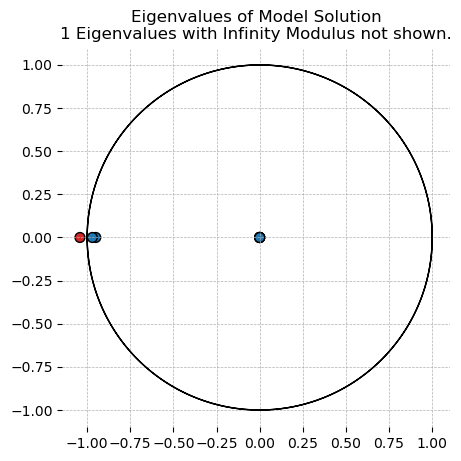

In [34]:
gp.plot_eigenvalues(model, linearize_model_kwargs={"steady_state": ss_res});

## Impulse Response Functions

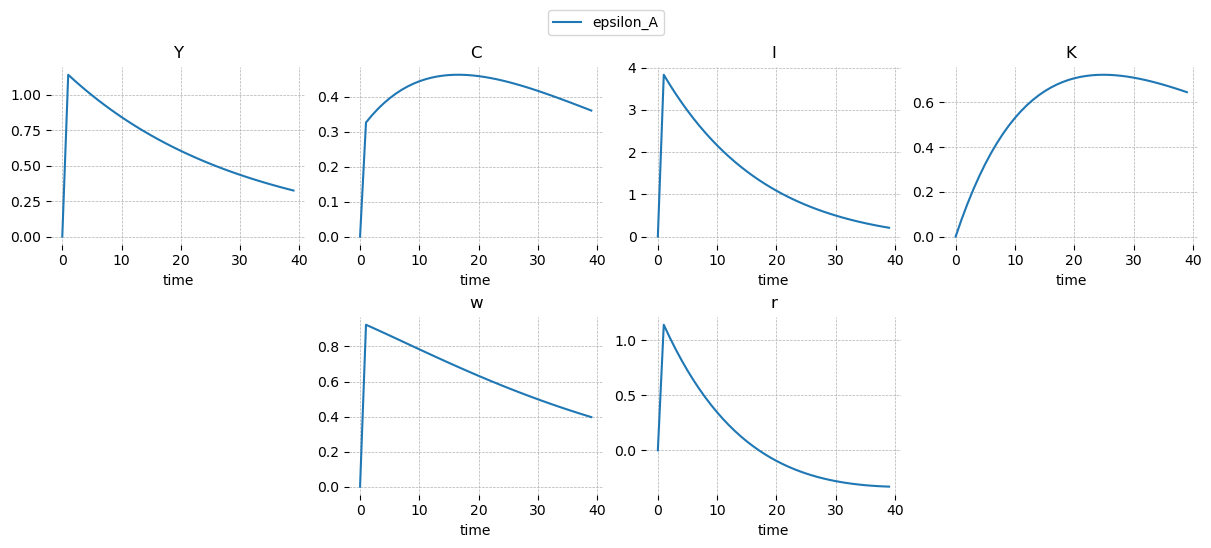

In [35]:
irf = ge.impulse_response_function(model, T=T, R=R, shock_size={"epsilon_A": 1.0})
gp.plot_irf(
    irf,
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    n_cols=4,
    figsize=(12, 5),
    legend=True,
);

## Conversion to Dynare

I haven't added support for automatic conversion of steady state equations into a Dynare steady state block, but this is coming soon.

# Priors

With gEconpy, you can directly declare priors over parameters and shocks using a natural `~` notation. RBC_priors.gcn shows the following features:

1. Prior declaration

Priors are declared directly in the GCN file using the following notation:

```
sigma_C ~ N(mu=1.5, sd=0.1, lower=1.0) = 1.5;
sigma_L ~ N(loc=2.0, scale=0.1, lower=1.0) = 2.0;
```

These parameters are drawn from normal distributions, which can be parameterized using `loc` and `scale`, or `mu` and `sigma`. All supported distributions can be parameterized via their moments or via loc-scale-shape. See the scipy documentation of a distribution for details on the latter. Supported distributions are Normal, Beta, HalfNormal, Gamma, Inverse Gamma, Uniform, and Truncated Normal. These two distributions are actually truncated normals -- gEconpy will automatically try to convert a normal distribution to a truncated distribution if bounds, lower or upper, are declared.

The `=` sign after the distribution declares the initial value of the distribution.


2. Compound distributions

Distributions in gEconpy can be parameterized by other distributions. This is especially useful when declaring shock distributions:

```
shocks
{
    epsilon_A[] ~ N(mean=0, sd=sigma_epsilon);
};

calibration
{
    rho_A ~ Beta(mean=0.95, sd=0.04) = 0.95;
    sigma_epsilon ~ Inv_Gamma(mean=0.1, sd=0.01) = 0.01;
};
```

The technology innovation `epsilon_A` is a normal distribution with a random standard deviation that follows an inverse gamma distribution. When you ask for samples of `epsilon_A` from the model, it will automatically draw from the inverse_gamma, then draw from the normal conditional on the sampled value of `sigma_epsilon`.

Note also that `rho_A` is defined using the first and second moments of the beta distribution. One could also pass shape parameters `a` and `b`, or use `loc` and `scale` to further shift or scale the beta distribution.

Finally, note that because `epsilon_A` is a variable, not a parameter (it has `[]`), there is no initial value assigned after the distribution. An error will be raised if you try to give it one.

In [36]:
file_path = "../GCN Files/RBC_priors.gcn"
model = ge.model_from_gcn(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	6 parameters
		 4 / 6 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



Initial values are whatever is given after the `=`, as explained above.

In [37]:
model.parameters()

{'alpha': 0.35,
 'beta': 0.99,
 'delta': 0.02,
 'rho_A': 0.95,
 'sigma_C': 1.5,
 'sigma_L': 2.0}

Priors are stored as a tuple in `model.priors`

In [38]:
model.priors

({'sigma_C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09aab238f0>,
  'sigma_L': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09ab52d460>,
  'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09aac7b890>,
  'rho_A': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09aac7bc50>},
 {'epsilon_A': <gEconpy.parser.parse_distributions.CompositeDistribution at 0x7f09aaf6c4d0>},
 {sigma_epsilon: (epsilon_A_t,
   'sd',
   <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09aad98920>)})

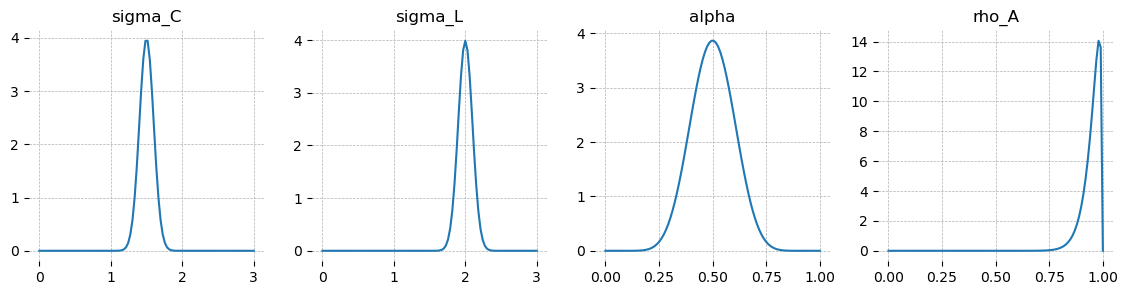

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(14, 3), dpi=100)
for axis, (param, d) in zip(fig.axes, model.priors[0].items()):
    lower, upper = d.a, d.b
    lower = max(lower, 0)
    upper = min(3, upper)
    x_grid = np.linspace(lower, upper, 100)
    axis.plot(x_grid, d.pdf(x_grid))
    axis.set(title=param)
    [spine.set_visible(False) for spine in axis.spines.values()]
    axis.grid(ls="--", lw=0.5)
plt.show()

As described above, `epsilon_A` is a composite distribution that first draws from `sigma_epsilon`, then draws from `epsilon_A`

In [40]:
model.priors[1]

{'epsilon_A': <gEconpy.parser.parse_distributions.CompositeDistribution at 0x7f09aaf6c4d0>}

The underlying distributions can be accessed if needed using `rv_params`, for "random variable parameters".

In [41]:
model.priors[1]["epsilon_A"].rv_params

{'scale': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f09aad98920>}

In [42]:
scale_grid = np.linspace(0.05, 0.15, 100)
eps_grid = np.linspace(-0.25, 0.25, 100)

xx, yy = np.meshgrid(scale_grid, eps_grid)

pdf_grid = [
    [
        model.priors[1]["epsilon_A"].pdf({"scale": scale, "obs": eps})
        for scale in scale_grid
    ]
    for eps in eps_grid
]

Compared to a standard Normal distribution, we get fatter tails by parameterizing the standard deviation with an inverse gamma distribution.

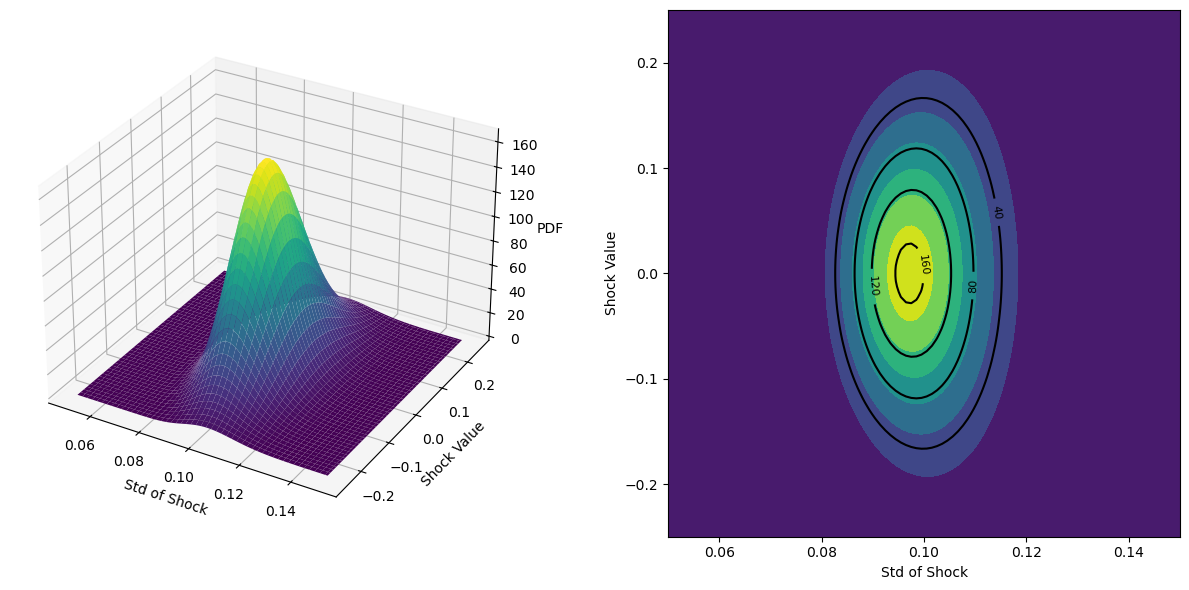

In [43]:
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)

axis = fig.add_subplot(gs[:, 0], projection="3d")
axis.plot_surface(xx, yy, np.array(pdf_grid), cmap="viridis")
axis.set(xlabel="Std of Shock", ylabel="Shock Value", zlabel="PDF")
axis = fig.add_subplot(gs[:, 1])
cs = axis.contour(xx, yy, pdf_grid, levels=4, colors="k")
axis.contourf(xx, yy, pdf_grid)
axis.clabel(cs, cs.levels, inline=True, fontsize=8)
axis.set(xlabel="Std of Shock", ylabel="Shock Value")
fig.tight_layout(w_pad=6)

In [44]:
ss_res = model.steady_state()
ge.print_steady_state(ss_res)

You provided a function to compute the full hessian, but method trust-ncg allows the use of a hessian-vector product instead. Consider passing hessp instead -- this may be significantly more efficient.


Output()

Steady state IS found, although optimizer returned success = False.
This can be ignored, but to silence this message, try reducing the solver-specific tolerance, or use a different solution algorithm.
--------------------------------------------------------------------------------
Optimizer message             A bad approximation caused failure to predict improvement.
Sum of squared residuals      7.817537743289768e-29
Maximum absoluate error       8.552207923778995e-15
Gradient L2-norm at solution  5.825605443052315e-16
Max abs gradient at solution  5.620504062164855e-16
A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


In [45]:
T, R = model.solve_model(steady_state=ss_res)

Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


## Model Statistics

Model statistics are computed at the initial values of the parameters -- there is no integration of the prior information into the stationary covariance matrix or autocorrelation function. 